In [43]:
#import libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#enable inline plot
%matplotlib inline

In [46]:
#use pandas library to read  .csv file of passengers on titanic and store in a dataframe object
titanic=pd.read_csv("C:/Train/JKT/Dataset/Titanic.csv")

In [47]:
#check first few lines of the dataframe

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#check basic information about the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
#get counts by sex or gender
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

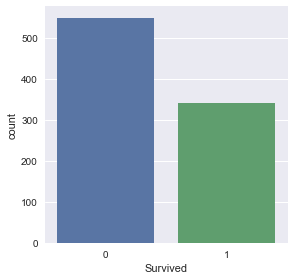

In [15]:
sns.factorplot('Survived',data=titanic,kind='count')
plt.savefig("survived")

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


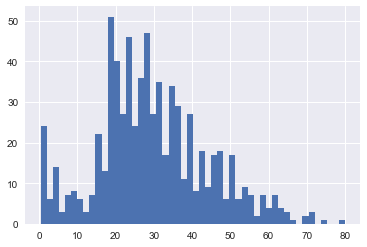

In [20]:
#plot histogram of age
titanic['Age'].hist(bins=50)

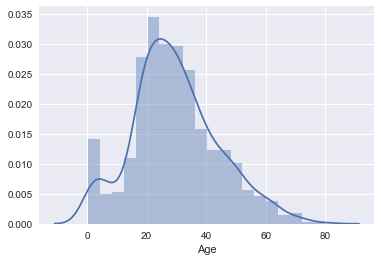

In [21]:
#overlay histogram with kde

sns.distplot(titanic['Age'].dropna())

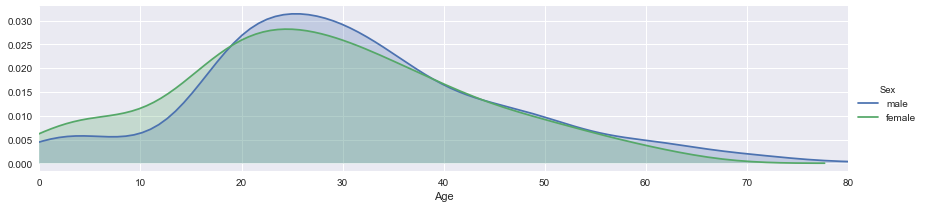

In [37]:
fig=sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.add_legend()
fig.set(xlim=(0,oldest))
plt.savefig('kdeplot')

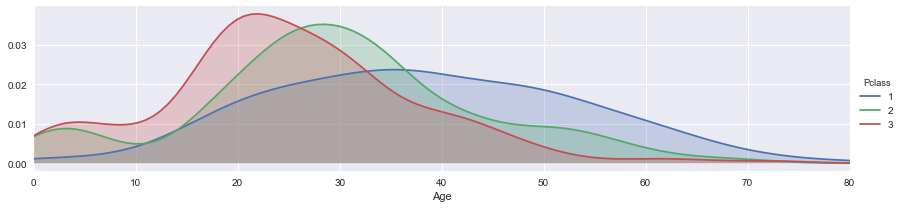

In [38]:
fig=sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [78]:
import sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.3)
train_df=train[["Pclass","Sex","Age","Fare","Survived"]]
test_df= test[["Pclass","Sex","Age","Fare","PassengerId","Survived"]]

In [73]:
test_df.head()

,Pclass,Sex,Age,Fare
40,3,female,40.0,9.4750
597,3,male,49.0,0.0000
429,3,male,32.0,8.0500
197,3,male,42.0,8.4042
618,2,female,4.0,39.0000


In [74]:
def load_file_train():
    
    #change male to 1 and female to 0
    train_df["Sex"] = train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
    train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
    survived = train_df["Survived"].values
    cols=list(train_df)
    data = train_df[cols].values
    return survived,data


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [79]:
def load_file_test():
    #change male to 1 and female to 0
    test_df["Sex"] = test_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())
    test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())
    cols=list(test_df)
    data = test_df[cols].values
    passId = test_df["PassengerId"].values
    return data,passId

NameError: name 'cols' is not defined

In [81]:
from sklearn.linear_model import LogisticRegression

def learn_model(survived,data_train,data_test,passId):
    #data_train, data_test, target_train, target_test = cross_validation.train_test_split(data, survived,
   #                                                                                      test_size=0.4, random_state=43)
    model = LogisticRegression()
    model.fit(data_train,survived)
    predicted = model.predict(data_test)
    #evaluate_model(predicted,target_test)
    output = pd.DataFrame(columns=['PassengerId', 'Survived'])
    output['PassengerId'] = passId
    output['Survived'] = predicted.astype(int)
    output.to_csv('logisticRegressionSubmit.csv', index=False)
    #write.csv(my_logit, file = "logisticRegressionSubmit.csv")

def main():
    survived, data_train = load_file_train()
    data_test,passId = load_file_test()
    learn_model(survived,data_train,data_test,passId)

# main function
main()

#Any files you save will be available in the output tab below
#train.to_csv('copy_of_the_training_data.csv', index=False)

C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

ValueError: X has 6 features per sample; expecting 5

In [56]:
def main():
    survived, data_train = load_file_train()
    data_test,passId = load_file_test()
    learn_model(survived,data_train,data_test,passId)

# main function
main()

#Any files you save will be available in the output tab below
#train.to_csv('copy_of_the_training_data.csv', index=False)

C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

NameError: name 'cols' is not defined